# **Correlation of Water Quality Parameters in Shrimp pond, Indramayu, Indonesia**

In [1]:
# Intial set up

# Import required libraries for data wrangling and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# statistics
from scipy.stats import shapiro # Normal test Shapiro
from scipy.stats import normaltest # Normal test D'Augustion Pearson
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# Customizing with 'ggplot' style
plt.style.use('ggplot')

In [2]:
# Setting the option to display all columns
pd.set_option('display.max_columns', None)

# loading data
data_all = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTOQO2R46-afex7CsDg-nRidlN6OQHZnyWso1EpzDkuPG8ZtLxNYBmV4jQD834dR6BRouiUnnaT3nbk/pub?gid=1607653434&single=true&output=csv')

# Displayin the first five rows of data
data_all.head(10)

,Salinity_ppt,Pond_Colour,SecchiDisk_cm,pH,Temperature_°C,DissolvedOxygen_mg/L,BOD_mg/L,TAN_mg/L,NH4_mg/L,NO2_mg/L,NO3_mg/L,TotalAlkalinity_mg/L,TOM_mg/L,PO4_mg/L,TotalHardness_mg/L,ORP_mV,TVC_CFU/mL,TBC_CFU/mL,H'_Fitoplankton,H'_Zooplankton,D_Fitoplankton,D_Zooplankton
0,22.0,Light_Brown,76.0,8.19,28.45,5.94,0.07,0.16,0.21,0.03,0.19,123.60,70.95,0.04,6200.0,188.0,20.0,1700.0,0.792,0.0,0.512,1.0
1,22.0,Brownish_Green,64.0,8.50,28.35,6.64,0.47,0.03,0.04,0.02,0.12,148.32,67.08,0.01,3400.0,173.0,0.0,800.0,0.792,0.0,0.512,1.0
2,24.0,Light_Green,63.0,8.15,28.40,6.12,0.47,0.13,0.16,0.01,0.11,140.08,64.50,0.03,4000.0,197.0,20.0,3400.0,0.792,0.0,0.512,1.0
3,22.0,Brown,54.0,8.30,26.90,4.98,0.07,0.16,0.21,0.03,0.19,123.60,70.95,0.04,6200.0,188.0,20.0,1700.0,0.792,0.0,0.512,1.0
4,21.0,Brown,54.0,8.63,26.95,4.70,0.47,0.03,0.04,0.02,0.12,148.32,67.08,0.01,3400.0,173.0,0.0,800.0,0.792,0.0,0.512,1.0
5,23.0,Light_Green,88.0,8.07,27.15,4.75,0.47,0.13,0.16,0.01,0.11,140.08,64.50,0.03,4000.0,197.0,20.0,3400.0,0.792,0.0,0.512,1.0
6,22.0,Brown,50.0,8.48,26.90,4.90,0.07,0.16,0.21,0.03,0.19,123.60,70.95,0.04,6200.0,188.0,20.0,1700.0,0.792,0.0,0.512,1.0
7,20.0,Brown,54.0,8.59,27.15,4.95,0.47,0.03,0.04,0.02,0.12,148.32,67.08,0.01,3400.0,173.0,0.0,800.0,0.792,0.0,0.512,1.0
8,23.0,Light_Green,92.0,8.30,27.25,4.85,0.47,0.13,0.16,0.01,0.11,140.08,64.50,0.03,4000.0,197.0,20.0,3400.0,0.792,0.0,0.512,1.0
9,21.0,Light_Brown,54.0,8.07,26.35,5.13,4.59,0.03,0.04,0.06,0.39,140.10,89.21,0.21,4000.0,202.0,190.0,12900.0,0.660,0.0,0.678,1.0


In [3]:
# Summary of dataset
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Salinity_ppt          117 non-null    float64
 1   Pond_Colour           117 non-null    object 
 2   SecchiDisk_cm         117 non-null    float64
 3   pH                    117 non-null    float64
 4   Temperature_°C        117 non-null    float64
 5   DissolvedOxygen_mg/L  117 non-null    float64
 6   BOD_mg/L              117 non-null    float64
 7   TAN_mg/L              117 non-null    float64
 8   NH4_mg/L              117 non-null    float64
 9   NO2_mg/L              117 non-null    float64
 10  NO3_mg/L              117 non-null    float64
 11  TotalAlkalinity_mg/L  117 non-null    float64
 12  TOM_mg/L              117 non-null    float64
 13  PO4_mg/L              117 non-null    float64
 14  TotalHardness_mg/L    117 non-null    float64
 15  ORP_mV                1

In [4]:
# defining numerical and categorical columns

# Identifying numerical columns (excluding datetime and object types) and excluding 'Minggu Ke-' (We do not use 'Minggu Ke-' for EDA observation)
numerical = [var for var in data_all.columns if data_all[var].dtypes in ['int64', 'float64']]

# Identifying categorical colums that contains 'object'
categorical = [var for var in data_all.columns if data_all[var].dtypes in ['object']]

pd.set_option('max_colwidth', None)
pd.DataFrame({
    "Column Type":["Categorical","Numerical"],
    "Columns":[categorical, numerical]
})

,Column Type,Columns
0,Categorical,[Pond_Colour]
1,Numerical,"[Salinity_ppt, SecchiDisk_cm, pH, Temperature_°C, DissolvedOxygen_mg/L, BOD_mg/L, TAN_mg/L, NH4_mg/L, NO2_mg/L, NO3_mg/L, TotalAlkalinity_mg/L, TOM_mg/L, PO4_mg/L, TotalHardness_mg/L, ORP_mV, TVC_CFU/mL, TBC_CFU/mL, H'_Fitoplankton, H'_Zooplankton, D_Fitoplankton, D_Zooplankton]"


In [5]:
# Normal test, skewness and data distribution of numerical data

# Identifying numerical columns (excluding datetime and object types) 
numerical = [var for var in data_all.columns if data_all[var].dtypes in ['int64', 'float64']]

from scipy.stats import normaltest

alpha = 0.05
index = 1

dist_info = []
for feature_name in numerical:
    stat, p_value = normaltest(data_all[feature_name].dropna())
    
    if p_value > alpha:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    skewness = data_all[feature_name].skew()
    
    if skewness > 0:
        skewness_type = "Right Skew"
    else:
        skewness_type = "Left Skew"
    
    dist_info.append([feature_name, stat, p_value, distribution, skewness, skewness_type])

distribution_info = pd.DataFrame(dist_info, columns=["Feature", 
                                                     "D'Agostino-Pearson Statistic", 
                                                     "P-value", 
                                                     "Distribution", 
                                                     "Skewness",
                                                     "Skewness Type"])
distribution_info

,Feature,D'Agostino-Pearson Statistic,P-value,Distribution,Skewness,Skewness Type
0,Salinity_ppt,27.855236,8.939483e-07,Not Normally Distributed,0.908789,Right Skew
1,SecchiDisk_cm,64.228589,1.129638e-14,Not Normally Distributed,2.041248,Right Skew
2,pH,6.635743,3.622986e-02,Not Normally Distributed,0.513881,Right Skew
3,Temperature_°C,143.081907,8.514491e-32,Not Normally Distributed,-4.427231,Left Skew
4,DissolvedOxygen_mg/L,5.505700,6.374591e-02,Normally Distributed,-0.187547,Left Skew
5,BOD_mg/L,49.498232,1.784825e-11,Not Normally Distributed,-1.799754,Left Skew
6,TAN_mg/L,52.174323,4.682629e-12,Not Normally Distributed,1.947499,Right Skew
7,NH4_mg/L,52.182896,4.662598e-12,Not Normally Distributed,1.947672,Right Skew
8,NO2_mg/L,51.408921,6.865857e-12,Not Normally Distributed,1.784965,Right Skew
9,NO3_mg/L,8.682077,1.302299e-02,Not Normally Distributed,0.661462,Right Skew


In [6]:
# Normality test (Shapiro-Wilk), skewness and data distribution of numerical data

# Identifying numerical columns (excluding datetime and object types) and excluding 'Minggu Ke-' (We do not use 'Minggu Ke-' for EDA observation)
numerical = [var for var in data_all.columns if data_all[var].dtypes in ['int64', 'float64']]

from scipy.stats import shapiro

alpha = 0.05
index = 1

dist_info = []
for feature_name in numerical:
    stat, p_value = shapiro(data_all[feature_name].dropna())
    
    if p_value > alpha:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    skewness = data_all[feature_name].skew()
    
    if skewness > 0:
        skewness_type = "Right Skew"
    else:
        skewness_type = "Left Skew"
    
    dist_info.append([feature_name, stat, p_value, distribution, skewness, skewness_type])

distribution_info = pd.DataFrame(dist_info, columns=["Feature", 
                                                     "D'Agostino-Pearson Statistic", 
                                                     "P-value", 
                                                     "Distribution", 
                                                     "Skewness",
                                                     "Skewness Type"])
distribution_info

,Feature,D'Agostino-Pearson Statistic,P-value,Distribution,Skewness,Skewness Type
0,Salinity_ppt,0.879840,2.837442e-08,Not Normally Distributed,0.908789,Right Skew
1,SecchiDisk_cm,0.824005,1.664890e-10,Not Normally Distributed,2.041248,Right Skew
2,pH,0.958627,1.169989e-03,Not Normally Distributed,0.513881,Right Skew
3,Temperature_°C,0.601790,2.542419e-16,Not Normally Distributed,-4.427231,Left Skew
4,DissolvedOxygen_mg/L,0.982903,1.432006e-01,Normally Distributed,-0.187547,Left Skew
5,BOD_mg/L,0.795959,1.877713e-11,Not Normally Distributed,-1.799754,Left Skew
6,TAN_mg/L,0.681451,1.369758e-14,Not Normally Distributed,1.947499,Right Skew
7,NH4_mg/L,0.681269,1.356266e-14,Not Normally Distributed,1.947672,Right Skew
8,NO2_mg/L,0.829053,2.526097e-10,Not Normally Distributed,1.784965,Right Skew
9,NO3_mg/L,0.955712,6.977315e-04,Not Normally Distributed,0.661462,Right Skew


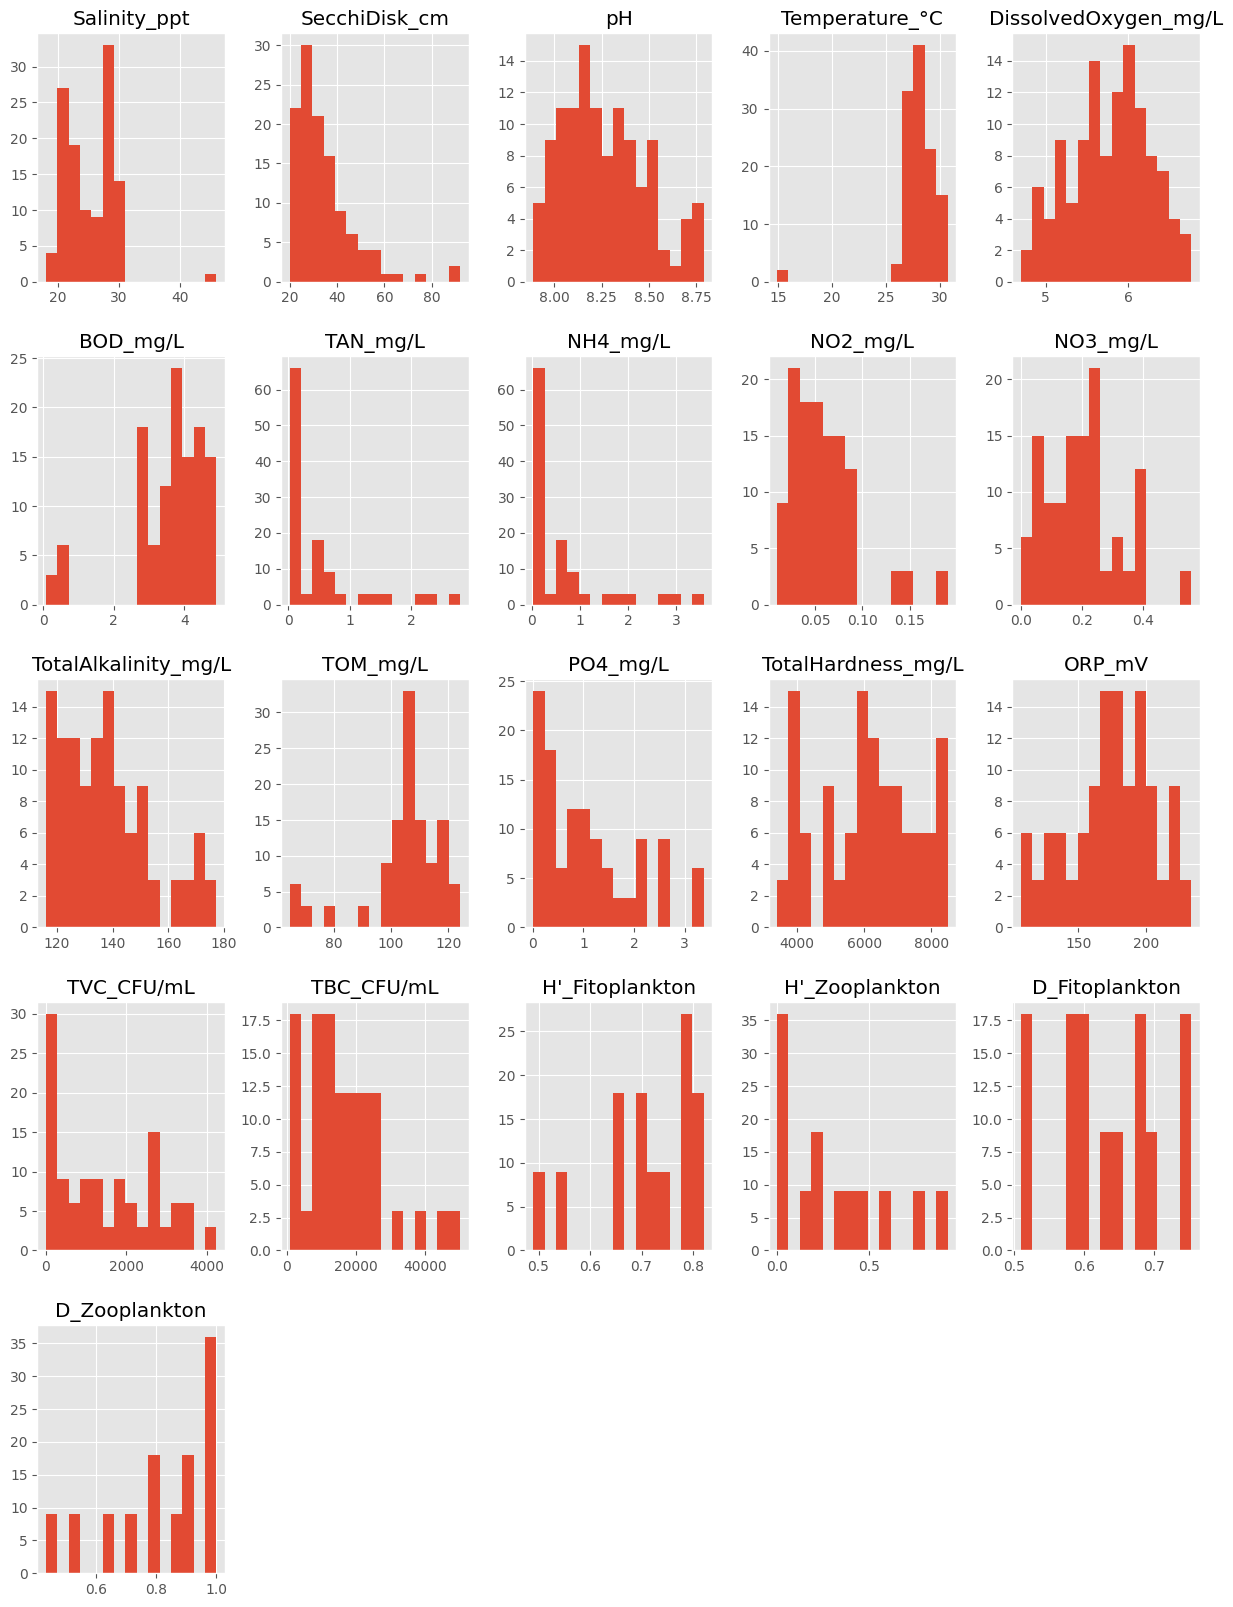

In [7]:
# ploting the histogram of numerical columns
# Checking data distribution of numerical columns via visual observation
data_all.hist(bins=15, figsize=(15,20))
plt.show()

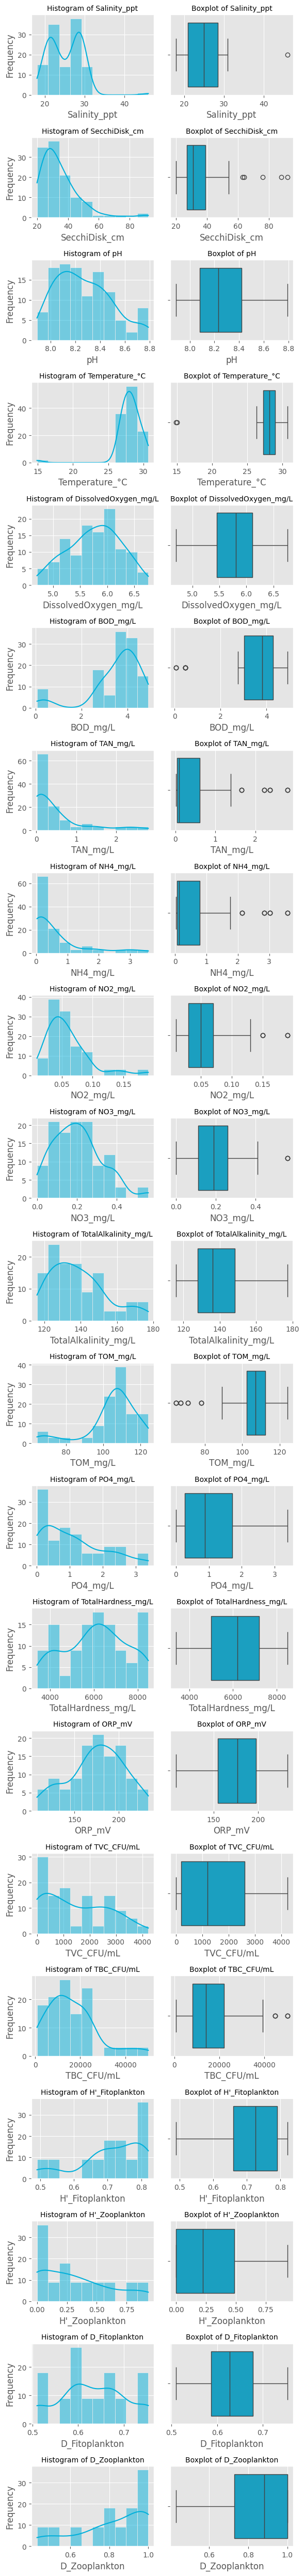

In [8]:
# Creating histogram for the numerical data
plt.figure(figsize=(6, 50))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data_all[col], kde=True, color='#00b0db', bins=10)
    plt.title(f'Histogram of {col}', size=10)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data_all[col], color='#00b0db')
    plt.title(f'Boxplot of {col}', size=10)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

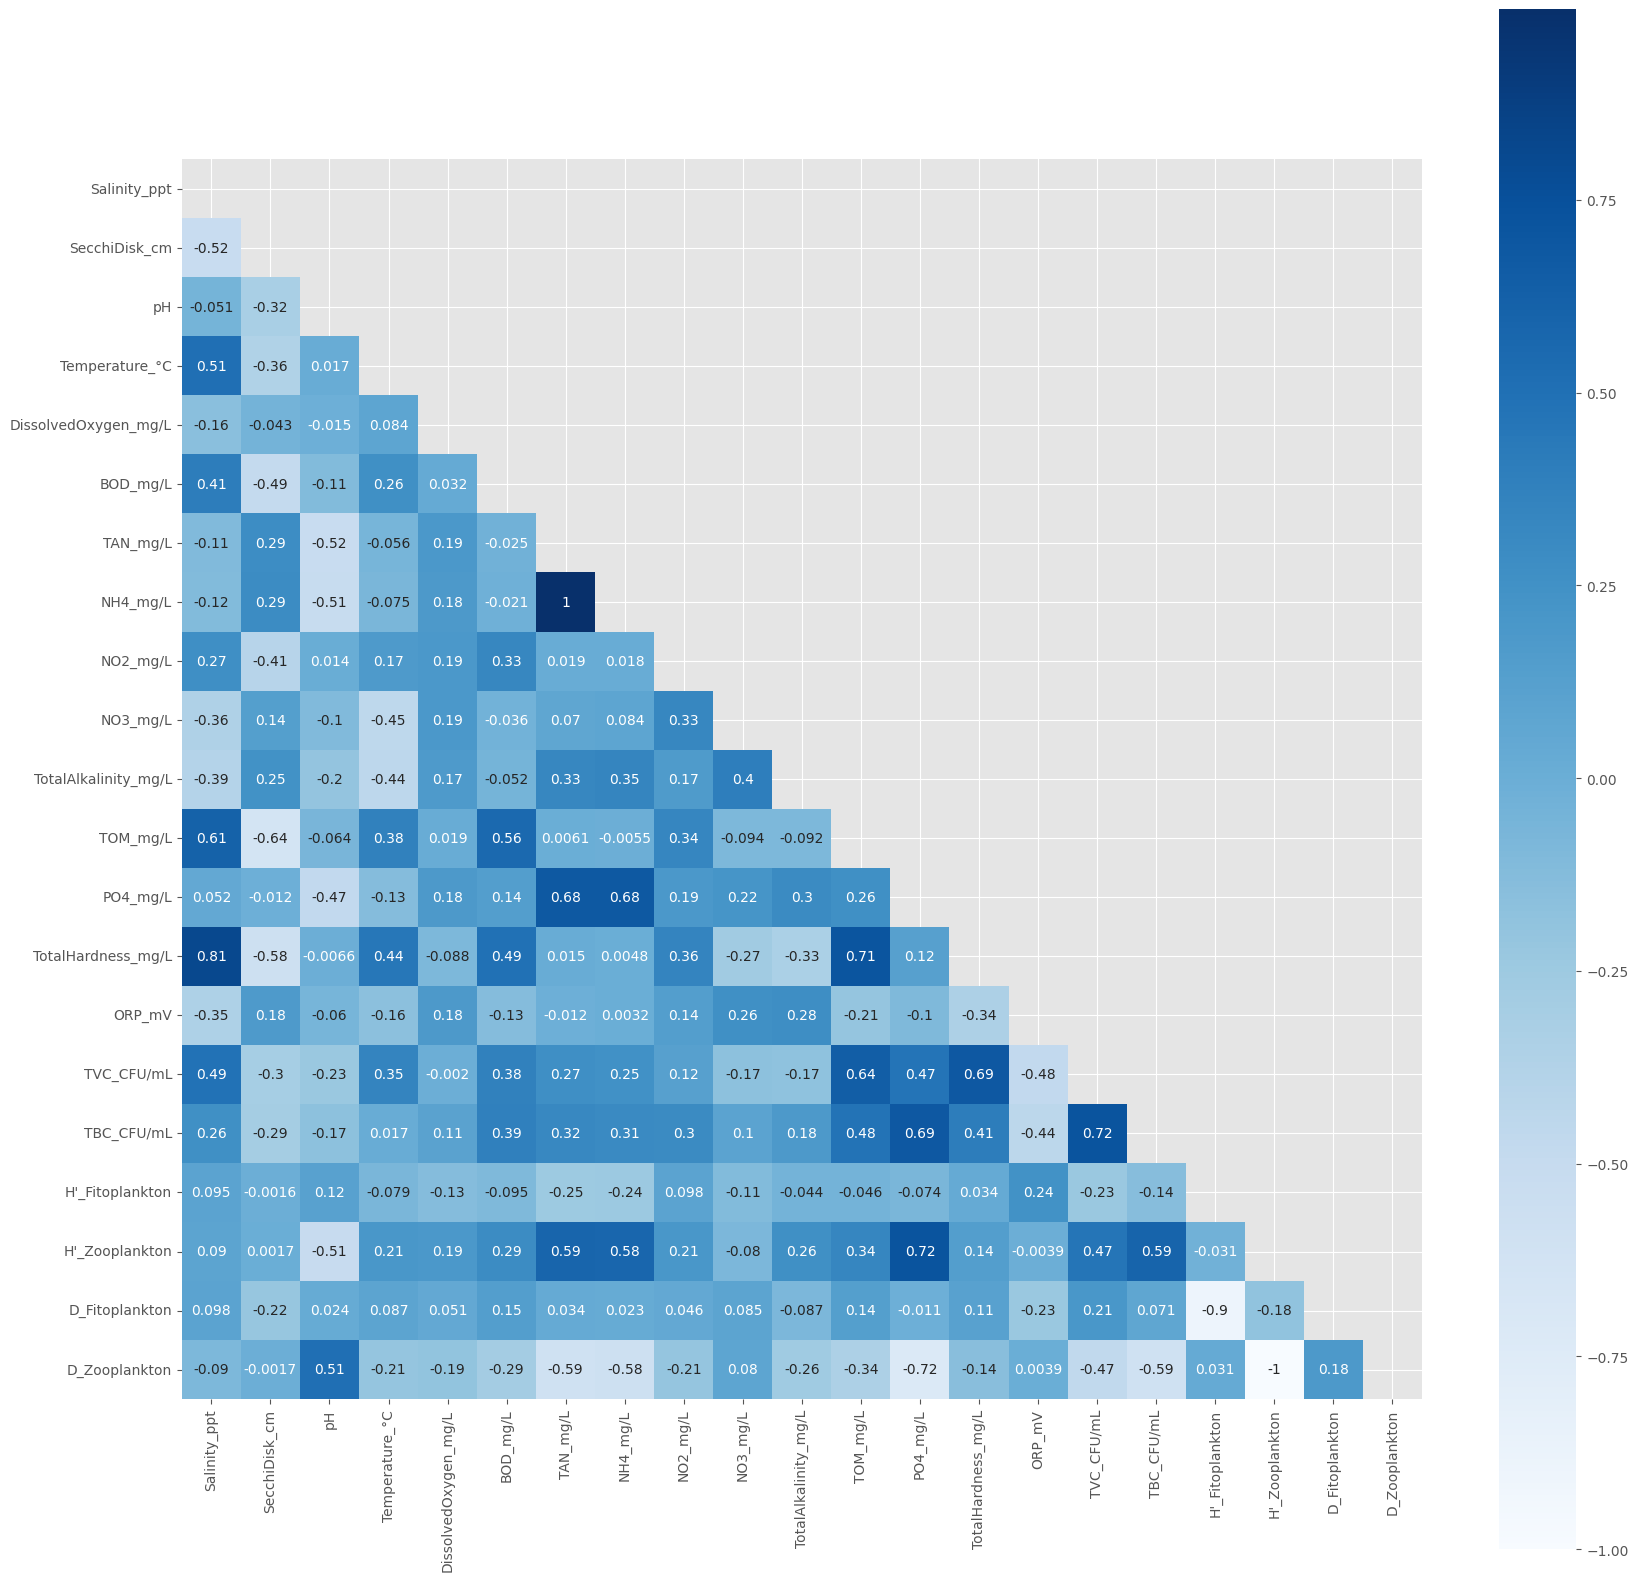

In [9]:
# Correlation between numerical features
plt.figure(figsize=(20, 20))

matrix = np.triu(data_all[numerical].corr(method='spearman'))

sns.heatmap(data=data_all[numerical].corr(method='spearman'), annot=True, cmap='Blues', center=0, mask = matrix, square='True')
plt.show()